# Example: using builders.py to create data

In [1]:
from sionna.rt import load_scene, Camera, PathSolver, RadioMapSolver

from builders import SceneTransceiverBuilder
from builders import TransceiverConfig

In [2]:
# Load empty scene
scene = load_scene(None)
scene.frequency = 28e9  # Hz

In [3]:
# Use the builder to create a scene explicitly with directed antennas
builder = SceneTransceiverBuilder(scene)
cfg = TransceiverConfig.positioned(
    n_tx=1, n_rx=4,
    tx_positions=[[0,0,1]],
    rx_positions=[[-20,0,1],[20,0,1],[0,20,1],[0,-20,1]],
    look_at=[-20,0,1],
    tx_power_dbm=44,
    tx_array_pattern="tr38901",
    polarization="V",
    seed=42
)
builder.build(cfg)

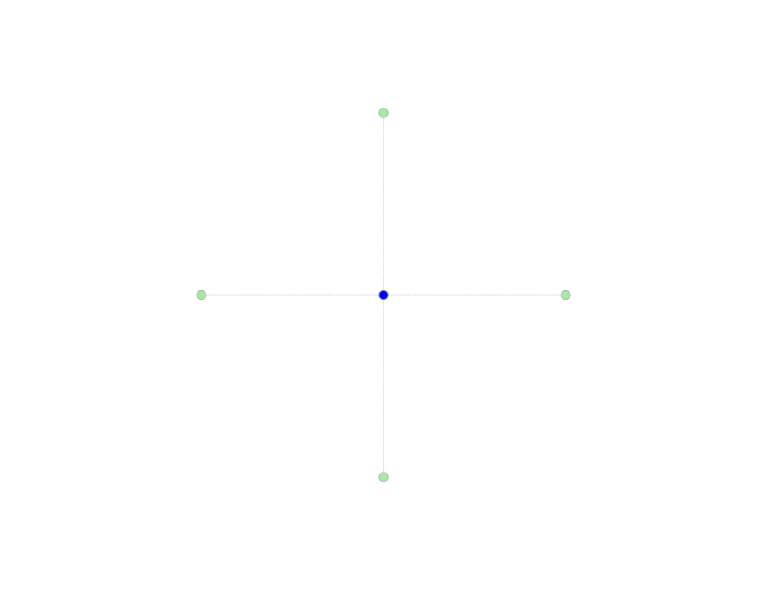

In [4]:
# Compute propagations between transmittor and receiver
p_solver  = PathSolver()
paths = p_solver(scene=scene,
                 max_depth=5,
                 los=True,
                 specular_reflection=True,
                 diffuse_reflection=False,
                 refraction=True,
                 synthetic_array=False,
                 seed=42)

my_cam = Camera(position=[0,0,100], look_at=[0,0,0])
scene.render(camera=my_cam, paths=paths, num_samples=512);

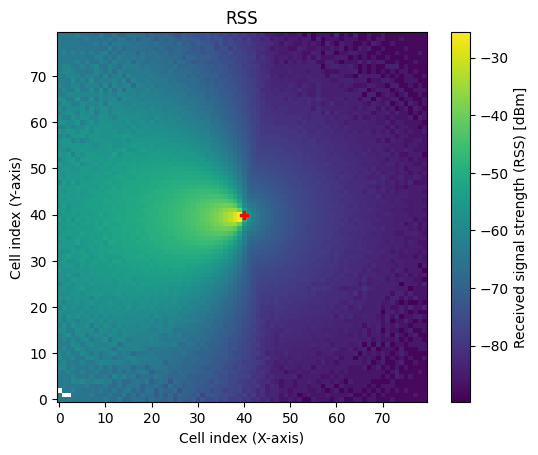

In [5]:
# Compute radio maps
rm_solver = RadioMapSolver()
rm = rm_solver(scene,
               max_depth=5,
               samples_per_tx=10**7 ,
               cell_size=(5, 5),
               center=[0, 0, 0],
               size=[400, 400],
               orientation=[0, 0, 0])

rm.show(metric="rss");

In [6]:
# Now clean the scene (auto) and create a new with randomised positions
# Since it is the same scene we only need to pass the updates to the config (+ transceivers and their range)
random_cfg = TransceiverConfig.randomized(
    n_tx=2,
    n_rx=14,
    random_tx_range=(( -5,  5), (-5,  5), 1.0),
    random_rx_range=(( -30, 30), (-10, 10), 1.0),
    tx_array_pattern="iso",  # now we use isotropic pattern for direction
)
builder.build(random_cfg)

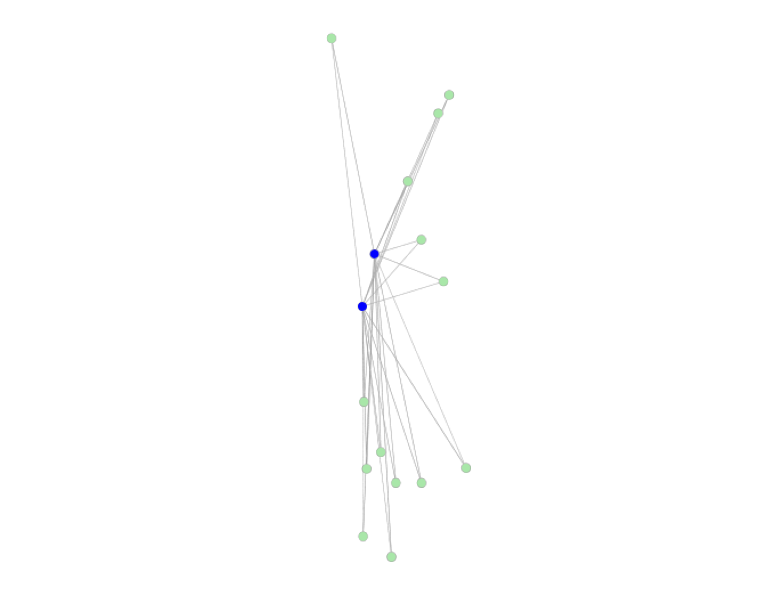

In [7]:
p_solver  = PathSolver()
paths = p_solver(scene=scene,
                 max_depth=5,
                 los=True,
                 specular_reflection=True,
                 diffuse_reflection=False,
                 refraction=True,
                 synthetic_array=False,
                 seed=42)

my_cam = Camera(position=[0,0,100], look_at=[0,0,0])
scene.render(camera=my_cam, paths=paths, num_samples=512);

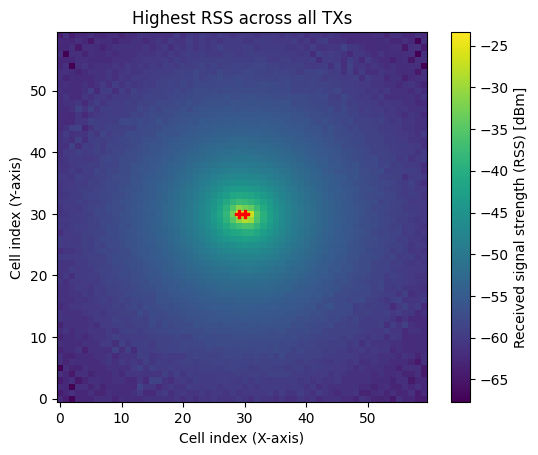

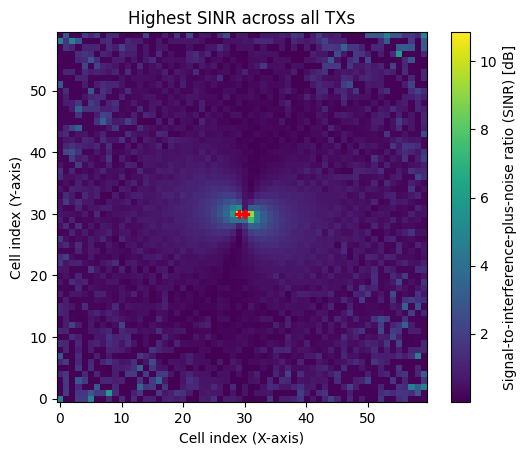

In [8]:
rm_solver = RadioMapSolver()
rm = rm_solver(scene,
               max_depth=5,
               samples_per_tx=10**7 ,
               cell_size=(5, 5),
               center=[0, 0, 0],
               size=[300, 300],
               orientation=[0, 0, 0])

rm.show(metric="rss");
rm.show(metric="sinr");

In [9]:
# Now we do the same thing but generate them inside the Etoile scene
import sionna
scene_etoile = load_scene(sionna.rt.scene.etoile)

In [10]:
builder = SceneTransceiverBuilder(scene_etoile)
cfg = TransceiverConfig.randomized(
    n_tx=2,   # blue
    n_rx=14,  # green
    random_tx_range=(( -20,  20), (-20,  20), 1.0),
    random_rx_range=(( -300, 300), (-200, 200), 1.0),
    look_at=[-20,0,1],
    tx_power_dbm=44,
    tx_array_pattern="tr38901",
    polarization="V",
    seed=42
)
builder.build(cfg)

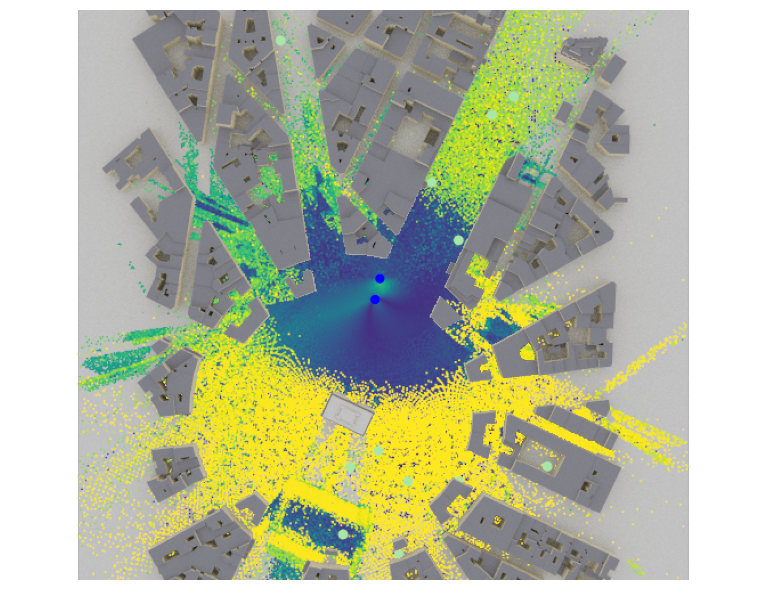

In [11]:
# Calculate the radio map
rm_etoile = rm_solver(scene_etoile,
                      max_depth=5,           
                      samples_per_tx=10**7,
                      cell_size=(1, 1))

# Render
my_cam = Camera(position=[0,0,1000], look_at=[0,0,0])
scene_etoile.render(camera=my_cam,
                    radio_map=rm_etoile,
                    rm_metric="sinr",
                    rm_vmin=-10,
                    rm_vmax=60);